In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [30]:
import pandas as pd
from fastdtw import fastdtw

In [28]:
cpu_ts = pd.read_csv('./cluster_cpu_metrics_7d_15m.csv')

In [38]:
sample_df = cpu_ts.set_index('timestamp')

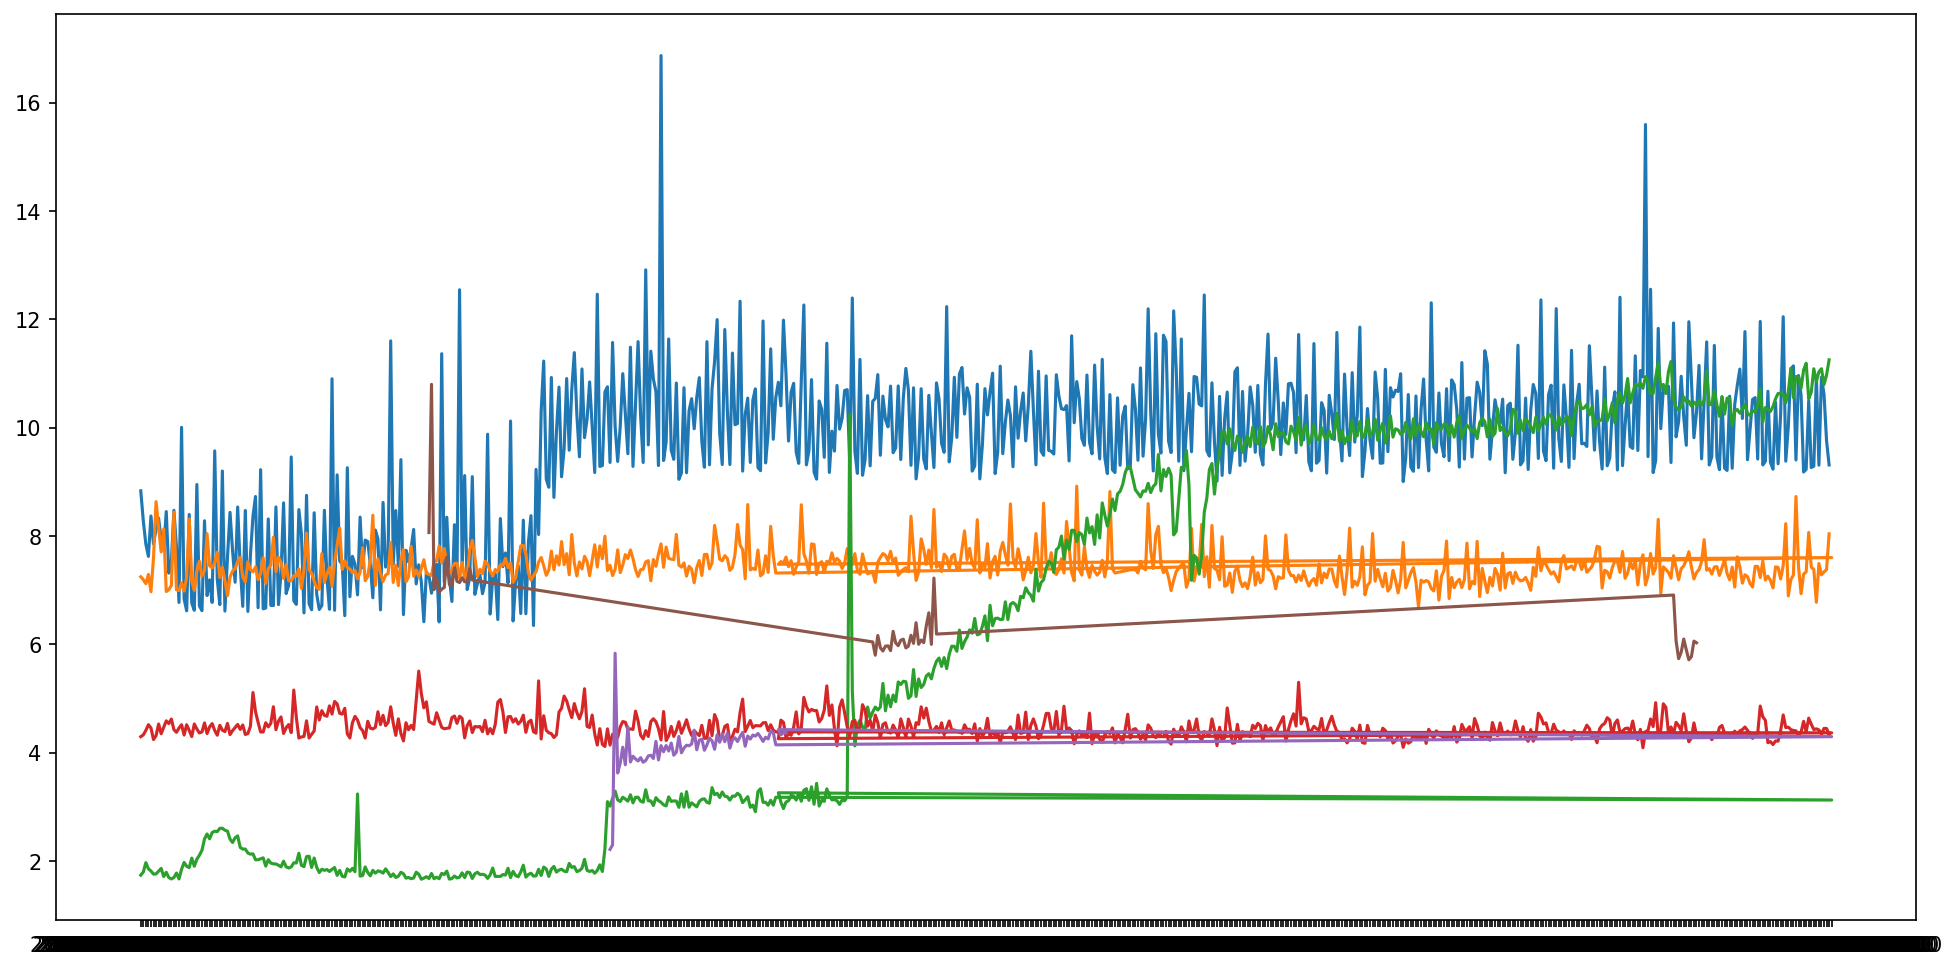

In [56]:
plt.figure(figsize=(16, 8), dpi=150)
sample_size = 5
count = 0
for cluster_id, df in sample_df.groupby('cluster_id'):
    plt.plot(df.index,df['Cpu_usage'],label='line')
    if count == sample_size:
        break
    #df['Cpu_usage'].plot(legend="!@#")
    count += 1 
plt.show()

In [57]:
from tslearn.generators import random_walks

In [70]:
X = random_walks(n_ts=2,sz=3,d=2)

In [71]:
X

array([[[ 0.05355606,  0.70006777],
        [-0.3967391 ,  0.1722635 ],
        [ 1.02327381,  0.23802121]],

       [[ 0.50875348,  0.47451675],
        [ 0.92463868,  0.19053864],
        [ 0.32540928, -0.62426904]]])

In [72]:
cluster1 = sample_df.loc[sample_df['cluster_id']=='00a1eccf-a8ec-4db9-95b8-567ccdc3357b']

In [76]:
cluster2 = sample_df.loc[sample_df['cluster_id']=='00f1824f-586d-437d-880d-c900191f400d']

In [113]:
cluster3 = sample_df.loc[sample_df['cluster_id']=='00f4b4eb-f8b6-48c1-8e2c-c86118593f4b']

In [136]:
cluster3.head()

,Cpu_usage,cluster_id
timestamp,,
2022-06-16 12:15:00,2.216476,00f4b4eb-f8b6-48c1-8e2c-c86118593f4b
2022-06-16 12:30:00,2.298381,00f4b4eb-f8b6-48c1-8e2c-c86118593f4b
2022-06-16 12:45:00,5.836571,00f4b4eb-f8b6-48c1-8e2c-c86118593f4b
2022-06-16 13:00:00,3.626476,00f4b4eb-f8b6-48c1-8e2c-c86118593f4b
2022-06-16 13:15:00,3.812000,00f4b4eb-f8b6-48c1-8e2c-c86118593f4b


In [ ]:
index1 = cluster1.in

In [137]:
cluster4 = cluster1.loc[cluster1.index.map(lambda x: x in cluster3.index)]

In [138]:
cluster4.head()

,Cpu_usage,cluster_id
timestamp,,
2022-06-16 12:15:00,3.014762,00a1eccf-a8ec-4db9-95b8-567ccdc3357b
2022-06-16 12:30:00,3.157238,00a1eccf-a8ec-4db9-95b8-567ccdc3357b
2022-06-16 12:45:00,3.291714,00a1eccf-a8ec-4db9-95b8-567ccdc3357b
2022-06-16 13:00:00,3.129238,00a1eccf-a8ec-4db9-95b8-567ccdc3357b
2022-06-16 13:15:00,3.101015,00a1eccf-a8ec-4db9-95b8-567ccdc3357b


In [93]:
c1_np = cluster1.to_numpy().reshape(1,664, 2)

In [94]:
c2_np = cluster2.to_numpy().reshape(1,664, 2)

In [103]:
c3_np = cluster3.to_numpy().reshape(1,71,2)

In [105]:
combined = np.concatenate((c1_np,c3_np),axis=0,dtype=object)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 664 and the array at index 1 has size 71

In [97]:
c1_np.shape, c2_np.shape, combined.shape

((1, 664, 2), (1, 664, 2), (2, 664, 2))

In [99]:
c3_np

array([[[1.740761904761912, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b'],
        [1.798571428571446, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b'],
        [1.971809523809508, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b'],
        ...,
        [10.798857142856631, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b'],
        [10.974236556419156, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b'],
        [11.25438095237949, '00a1eccf-a8ec-4db9-95b8-567ccdc3357b']],

       [[4.297238095255481, '00f1824f-586d-437d-880d-c900191f400d'],
        [4.330509959813241, '00f1824f-586d-437d-880d-c900191f400d'],
        [4.413428571429991, '00f1824f-586d-437d-880d-c900191f400d'],
        ...,
        [4.450761904762616, '00f1824f-586d-437d-880d-c900191f400d'],
        [4.447809523809703, '00f1824f-586d-437d-880d-c900191f400d'],
        [4.33454243485856, '00f1824f-586d-437d-880d-c900191f400d']]],
      dtype=object)